# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайны: 
* ФИВТ, третий курс - 4 марта 23:59
* Открытый курс - 7 марта, 23:59
</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

# Ваш код здесь
A = np.random.randint(0, 100, (10, 10))
A

array([[98, 36, 53, 48, 29,  0, 93, 89,  3, 69],
       [24, 62, 65, 24, 39, 13, 14, 11, 81, 14],
       [41, 82, 54, 91, 10, 86, 70, 11, 69, 23],
       [45, 83, 46, 53, 46, 71, 73, 86, 32, 63],
       [37, 37, 46, 94, 22, 35, 11, 66, 61, 10],
       [40,  9, 59, 76,  8, 70, 19,  0,  9,  5],
       [94, 41, 88, 52, 77, 26,  5, 95,  3, 15],
       [67, 72, 34, 35, 72, 20, 63, 53,  2, 91],
       [68, 27,  1, 50, 58, 89, 85, 57,  5, 84],
       [ 4, 31, 97, 21, 31, 85, 91, 45, 83,  9]])

In [3]:
# Посчитайте средние значения в матрице по столбцам

# Ваш код здесь
np.mean(A, axis = 0)

array([51.8, 48. , 54.3, 54.4, 39.2, 49.5, 52.4, 51.3, 34.8, 38.3])

In [4]:
# Транспонируйте матрицу A

# Ваш код здесь
A_T = A.T
A_T

array([[98, 24, 41, 45, 37, 40, 94, 67, 68,  4],
       [36, 62, 82, 83, 37,  9, 41, 72, 27, 31],
       [53, 65, 54, 46, 46, 59, 88, 34,  1, 97],
       [48, 24, 91, 53, 94, 76, 52, 35, 50, 21],
       [29, 39, 10, 46, 22,  8, 77, 72, 58, 31],
       [ 0, 13, 86, 71, 35, 70, 26, 20, 89, 85],
       [93, 14, 70, 73, 11, 19,  5, 63, 85, 91],
       [89, 11, 11, 86, 66,  0, 95, 53, 57, 45],
       [ 3, 81, 69, 32, 61,  9,  3,  2,  5, 83],
       [69, 14, 23, 63, 10,  5, 15, 91, 84,  9]])

In [5]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

# Ваш код здесь
B = (A * A_T)
B

array([[9604,  864, 2173, 2160, 1073,    0, 8742, 5963,  204,  276],
       [ 864, 3844, 5330, 1992, 1443,  117,  574,  792, 2187,  434],
       [2173, 5330, 2916, 4186,  460, 5074, 6160,  374,   69, 2231],
       [2160, 1992, 4186, 2809, 4324, 5396, 3796, 3010, 1600, 1323],
       [1073, 1443,  460, 4324,  484,  280,  847, 4752, 3538,  310],
       [   0,  117, 5074, 5396,  280, 4900,  494,    0,  801,  425],
       [8742,  574, 6160, 3796,  847,  494,   25, 5985,  255, 1365],
       [5963,  792,  374, 3010, 4752,    0, 5985, 2809,  114, 4095],
       [ 204, 2187,   69, 1600, 3538,  801,  255,  114,   25, 6972],
       [ 276,  434, 2231, 1323,  310,  425, 1365, 4095, 6972,   81]])

In [6]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

# Ваш код здесь
C = np.dot(A, A_T)
C

array([[38194, 13802, 23773, 32600, 20316, 13390, 30045, 31589, 30560,
        21894],
       [13802, 17985, 20282, 18647, 15702,  9464, 16675, 15091, 11388,
        19759],
       [23773, 20282, 37409, 32237, 24754, 20646, 21653, 23336, 26694,
        30274],
       [32600, 18647, 32237, 38714, 24392, 16617, 29401, 32096, 33543,
        29525],
       [20316, 15702, 24754, 24392, 23697, 15105, 23193, 17504, 18494,
        20512],
       [13390,  9464, 20646, 16617, 15105, 16369, 15906, 11640, 15596,
        16477],
       [30045, 16675, 21653, 29401, 23193, 15906, 36854, 26847, 24082,
        20986],
       [31589, 15091, 23336, 32096, 17504, 11640, 26847, 32701, 30270,
        19568],
       [30560, 11388, 26694, 33543, 18494, 15596, 24082, 30270, 36694,
        23090],
       [21894, 19759, 30274, 29525, 20512, 16477, 20986, 19568, 23090,
        36289]])

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [67]:
all_data = pd.read_csv('forest_dataset.csv')

Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [68]:
# Ваш код здесь
delayed_data = all_data.sample(frac = 0.2)
all_data = all_data.drop(index = delayed_data.index)

print (delayed_data.shape)
print (all_data.shape)

(2000, 55)
(8000, 55)


Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [69]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [70]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [71]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [72]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix,
                                                                                       two_class_labels)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [73]:
lr_clf = LogisticRegression()

In [78]:
# Ваш код здесь
lr_clf.fit(train_feature_matrix, train_labels)


y_pred = lr_clf.predict(test_feature_matrix)

acc_score = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

print('accuracy is ', acc_score)
print('f1_score is ', f1)

accuracy is  0.7764842840512224
f1_score is  0.7377049180327869


/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [84]:
lr_clf = LogisticRegression()

# Ваш код здесь
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix,
                                                                                        labels,
                                                                                        test_size=0.2,
                                                                                        random_state=42)

lr_clf.fit(train_feature_matrix, train_labels)

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [107]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' : ('l1', 'l2'), 'C' : np.linspace(0.01, 1, 10)}
grid_cv = GridSearchCV(lr_clf, parameters, scoring = 'accuracy', cv = 5)

grid_cv.fit(train_feature_matrix, train_labels)

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to con

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spe

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to con

/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.2

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to con

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to con

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

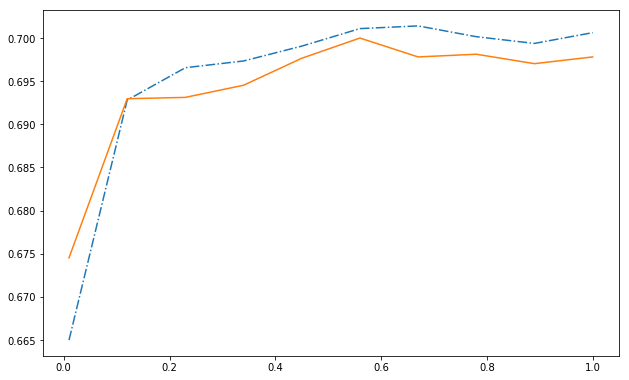

In [141]:
results = pd.DataFrame(grid_cv.cv_results_)
results.head(10)

# Ваш код здесь

l1_res = results[results['param_penalty'] == 'l1']
l2_res = results[results['param_penalty'] == 'l2']

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(l1_res['param_C'], l1_res['mean_test_score'], '-.')
axes.plot(l2_res['param_C'], l2_res['mean_test_score'])

plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [160]:
# Ваш код здесь
print('best params: ', grid_cv.best_params_)
print('best score: ', grid_cv.best_score_)

best params:  {'C': 0.67, 'penalty': 'l1'}
best score:  0.70140625


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [161]:
best_lr_clf = LogisticRegression(C = 0.67, penalty = 'l1')

best_lr_clf.fit(train_feature_matrix, train_labels)

probabilities = best_lr_clf.predict_proba(test_feature_matrix)
probabilities.shape

# Ваш код здесь

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(1600, 7)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [175]:
# Ваш код здесь
mean_proba = np.mean(probabilities, axis = 0)
print('mean_proba: ', mean_proba)

freq_proba = [float(len(train_labels[train_labels == i]) / len(train_labels)) for i in range(1, 8)]
print('freq_proba: ', freq_proba)

mean_proba:  [0.37568992 0.48476098 0.05893774 0.00391767 0.01728795 0.02739409
 0.03201164]
freq_proba:  [0.37140625, 0.4865625, 0.05953125, 0.00546875, 0.01515625, 0.02953125, 0.03234375]


#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

# Ваш код здесь

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [0]:
# Ваш код здесь

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [0]:
# Ваш код здесь

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [0]:
# Ваш код здесь